# Kolmogorov-Smirnov 
K-S Test is used to test independence between one continous and one cateogrical variables.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('calcium.txt', sep='\t')
X, Y = data['Treatment'], data['Decrease']
data.sample(6)

,Treatment,Begin,End,Decrease
3,Calcium,129,112,17
9,Calcium,102,104,-2
11,Placebo,109,97,12
13,Placebo,102,105,-3
15,Placebo,114,119,-5
8,Calcium,136,125,11


In [3]:
# Empirical CDFs of Treatment group
F_n = lambda x : sum(r <= x) / n

r = data[data['Treatment'] == 'Calcium']['Decrease'].to_numpy()
r = sorted(r)
n = len(r)

cdf_t = pd.DataFrame({
    't': r,
    'F_t': np.array(map(F_n, r)), 
})

In [4]:
# Empirical CDFs of Placebo group
F_n = lambda x : sum(r <= x) / n

r = data[data['Treatment'] == 'Placebo']['Decrease'].to_numpy()
r = sorted(r)
n = len(r)

cdf_p = pd.DataFrame({
    'p': r,
    'F_p': np.array(map(F_n, r)), 
})


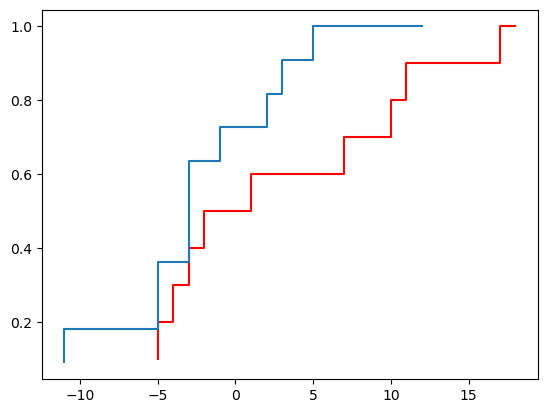

In [7]:
plt.step( 't', 'F_t', data=cdf_t, color='red')
plt.step( 'p', 'F_p', data=cdf_p)
plt.show()

In [13]:
from scipy.stats import ks_2samp
result = ks_2samp(data[data['Treatment'] == 'Placebo']['Decrease'].to_numpy(),
                  data[data['Treatment'] == 'Calcium']['Decrease'].to_numpy())
D_value, p_value = result.statistic, result.pvalue

# Print the results
print("KS Statistic:", D_value)

critical_D = 0.294 #From table for 0.05 alpha and n=20

if D_value > critical_D:
    print("Reject Null Hypothesis: Distributions are distinct - Treatment has an effect")

KS Statistic: 0.4090909090909091
Reject Null Hypothesis: Distributions are distinct - Treatment has an effect
